# Final Model 

Importing data from King County Public Housing Data from `kc_house_data`

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

### Creating DataFrame from `kc_house_data`

In [283]:
kc_data_full = pd.read_csv('kc_house_data.csv')

### Data Cleaning: Dropping '?', NaN, and unused columns

In [284]:
'''Dropping '?' from basement column'''

kc_data_full['sqft_basement'] = kc_data_full['sqft_basement'].replace("?",0)
kc_data_full = kc_data_full[~np.isnan(kc_data_full['waterfront'])]
kc_data_full = kc_data_full[~np.isnan(kc_data_full['view'])]
kc_data_full = kc_data_full.drop(['yr_renovated','lat','long'], axis=1)
kc_data_full['sqft_basement'] = kc_data_full['sqft_basement'].astype(float)
kc_data_full['zipcode'] = kc_data_full['zipcode'].astype(str)
kc_data_full = kc_data_full.drop(['id'], axis=1)

In [285]:
''' Splitting DataFrame into train and unseen data'''

' Splitting DataFrame into train and unseen data'

In [286]:
kc_train = kc_data_full[:9000]

### Creating log values for our variables that are not normal distributions

In [287]:
kc_train = kc_train.loc[kc_train['yr_built'] > 1975]

In [288]:
log_sqft_living = np.log(kc_train['sqft_living'])
log_bedrooms = np.log(kc_train['bedrooms'])
log_yr_built = np.log(kc_train['yr_built'])

In [289]:
kc_train['log_sqft'] = log_sqft_living
kc_train['log_bedrooms'] = log_bedrooms
kc_train['log_yr_built'] = log_yr_built

In [290]:
kc_train['price'] = np.log(kc_train['price'])


In [291]:
kc_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,log_sqft,log_bedrooms,log_yr_built
4,2/18/2015,13.142166,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503,7.426549,1.098612,7.594381
5,5/12/2014,14.022525,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930,8.597851,1.386294,7.601402
6,6/27/2014,12.458775,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,98003,2238,6819,7.447168,1.098612,7.598399
9,3/12/2015,12.685408,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,98038,2390,7570,7.544332,1.098612,7.602401
13,10/7/2014,12.899220,3,1.75,1370,9680,1.0,0.0,0.0,4,7,1370,0.0,1977,98074,1370,10208,7.222566,1.098612,7.589336


# Linear Regression Section

In [292]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [293]:
"""Create Logs of Certain Variables"""

'Create Logs of Certain Variables'

In [294]:
#log_price = kc_train['price']


In [295]:
# def models(df, feature_cols):
#     '''This is a function that outputs the Intercept, Coefficients, 3 types of Errors, and R-Squared'''
#     X = df[feature_cols]
#     y = df['price']
#     X_train, X_test, y_train, y_test = train_test_split(X,y)
#     linreg = LinearRegression()
#     linreg.fit(X_train, y_train)
#     print(f'Intercept of the regression line:',linreg.intercept_)
#     print(f'Coefficients:',linreg.coef_)
#     print('\n')
    
#     y_pred = linreg.predict(X_test)
    
#     print(f'Mean Absolute Error:',np.exp((metrics.mean_absolute_error(y_test, y_pred))))
#     print(f'Mean Squared Error:',np.exp((metrics.mean_squared_error(y_test, y_pred))))
#     print(f'Root Mean Squared Error:',np.exp((np.sqrt(metrics.mean_squared_error(y_test, y_pred)))))
#     print(f'R-Squared:',round(linreg.score(X,y),3))


In [296]:
models(df=kc_train, feature_cols=['log_sqft', 'grade'])

Intercept of the regression line: 7.5627283309652
Coefficients: [0.47702602 0.22859576]


Mean Absolute Error: 1.2682287957505893
Mean Squared Error: 1.09362240893434
Root Mean Squared Error: 1.3487226782998942
R-Squared: 0.66


In [297]:
kc_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,log_sqft,log_bedrooms,log_yr_built
4,2/18/2015,13.142166,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503,7.426549,1.098612,7.594381
5,5/12/2014,14.022525,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930,8.597851,1.386294,7.601402
6,6/27/2014,12.458775,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,98003,2238,6819,7.447168,1.098612,7.598399
9,3/12/2015,12.685408,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,98038,2390,7570,7.544332,1.098612,7.602401
13,10/7/2014,12.899220,3,1.75,1370,9680,1.0,0.0,0.0,4,7,1370,0.0,1977,98074,1370,10208,7.222566,1.098612,7.589336


## Cross Validation

In [298]:
feature_col = ['log_sqft', 'grade']
X = kc_train[feature_col]
y = kc_train['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.5)

linreg1 = LinearRegression()
results = linreg1.fit(X_train, y_train)

print(np.exp(linreg1.intercept_))

1809.143480153276


In [299]:
print (X_train.shape, y_train.shape)


(2009, 2) (2009,)


In [300]:
predictions = np.exp(linreg1.predict(X_test))
predictions[0:5]


array([693017.13304784, 367539.68868578, 287493.35727414, 458336.51217303,
       360127.42604381])

In [308]:
standardY= np.exp((y_test))
print(standardY)
standard = (predictions)
print(standard)

326      274975.0
7298     445000.0
6231     300000.0
2392     299500.0
1204     479000.0
4928     360000.0
6745     320000.0
1016     475000.0
3504     695000.0
6469     760000.0
2849     534000.0
7165    1260000.0
818      682000.0
6465    1150000.0
5044    1390000.0
4437     790000.0
9664     535000.0
3653     715000.0
4938     895000.0
4442     344000.0
4687     423000.0
1950     232500.0
9213     289000.0
3884     680000.0
7177     358000.0
8670     895000.0
270     1370000.0
5148     395000.0
9282     270000.0
5200    1050000.0
          ...    
8075     710000.0
1887     345000.0
762      330000.0
469      342500.0
59       430000.0
929      300000.0
3437     355000.0
8892     345000.0
1758     599950.0
4911     465000.0
4482    2000000.0
1394    1060000.0
7008     413900.0
7545     520000.0
2289     522250.0
4601     700000.0
9071     363000.0
5668     299500.0
2468     700000.0
9432     680000.0
1103     817500.0
9618     765000.0
7258     540000.0
361      380000.0
5617     4

In [309]:
print(np.sqrt(sum((standardY - standard) ** 2) / len(standardY)))

224961.66584596864


In [310]:
print('Score', linreg1.score(X_test, y_test))

Score 0.6545995408094742


In [311]:
scores = cross_val_score(linreg1, X, y, cv=5)
print('Cross Validated Scores', scores)

Cross Validated Scores [0.65023275 0.68626122 0.63325295 0.69337311 0.61934235]


Text(0, 0.5, 'Predictions')

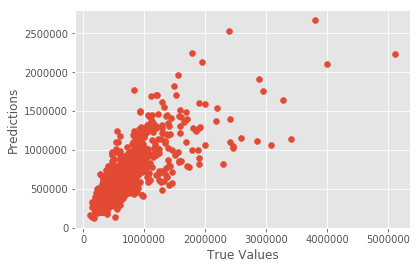

In [312]:
plt.scatter(standardY, standard)
plt.xlabel('True Values')
plt.ylabel('Predictions')